# Project - Finding the Best Markets to Advertise in an E-learning Platform

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.
<br>
<br>
To collect the information, we can conduct a survey to ask the respondents about their past experience in using e-learning platform. However, it would be time-consuming to design a survey. Meanwhile We have limited ability to reach out the target audience i.e someone who attended programming online course now or at the past. Therefore we will seek for the data from other data sources.

One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. However, since the courses offered by FreeCodeCamp at year 2017 were mainly related to web-development, so the result is not perfectly fair but it would still be a good data source as we are also offereing courses mainly in web development. 

## Understanding the data 

Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file

In [1]:
import numpy as np 
import pandas as pd 

userdata = pd.read_csv('2017-new-coder-survey.csv', low_memory = 0) # low_memory = False to silence dtypes warning
userdata.shape

(18175, 136)

In [2]:
userdata.head(n=5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check the sample representativity 

To find out the area that new coders are interested in, we would need to know: 
- Where are these new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain.

In [3]:
userdata['JobRoleInterest'].head(15)

0                                                   NaN
1                              Full-Stack Web Developer
2       Front-End Web Developer, Back-End Web Develo...
3       Front-End Web Developer, Full-Stack Web Deve...
4     Full-Stack Web Developer, Information Security...
5                                                   NaN
6                              Full-Stack Web Developer
7                                                   NaN
8                                                   NaN
9     Full-Stack Web Developer,   Quality Assurance ...
10                                                  NaN
11      DevOps / SysAdmin,   Data Scientist, Informa...
12                                                  NaN
13    Back-End Web Developer, Full-Stack Web Develop...
14                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object

The result shows that a respondent can have more than 1 interested roles. It will be interesting to see how many roles that the respondents are interested in. 

In [4]:
# Split each string in the 'JobRoleInterest' column
role_interested = userdata["JobRoleInterest"].dropna()
interest_list = role_interested.str.split(',')

# Generate a frequency table for the var describing the number of options
n_of_options = interest_list.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_values(ascending = False)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

We can see that most of the respondents have more than 1 interested roles. Among their interestes, the roles that they preferred are as follows:

In [5]:
userdata['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                  6.435927
  Data Scientist                                                                                                                           2.173913
Back-End Web Developer                                                                                                                     2.030892
  Mobile Developer                                                                                                                         1.673341
                                                                                                                                            ...    
Full-Stack Web Developer,   Data Scientist, Information Security, Data Engineer,   DevOps / SysAdmin            

From the frequency distribution above, we can see that people are more interested in web development area e.g full-stack web developer, front and back end developer etc. This can be because FreeCodeCamp offers their courses mainly in web development and with javascript. 
<br>
<br>
The data is more biased to those web development learners. However, since most of our courses are related on web and mobile development, the data can still be used to obtain insights. 
<br>
<br>
The percentage of respondents who are interested in web and mobile development courses is as follows: 

In [6]:
web_mobile = role_interested.str.contains('Web Developer|Mobile Developer')
freq_table = web_mobile.value_counts(normalize = True) * 100
freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

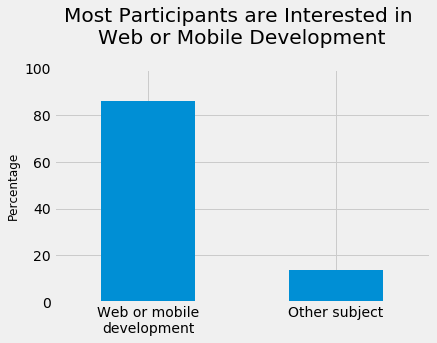

In [7]:
# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

## New Coders - Locations and Densities 

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.
<br>
<br>
To start with, those participants which did not answer their interested role will be taken out from the analysis as we cannot sure about their interest

In [8]:
userdata = userdata[userdata['JobRoleInterest'].notnull()]

Then we can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country).

In [9]:
# Counts the value in absolute value and percentage
country_absolute_value = userdata['CountryLive'].value_counts()
country_relative_value = userdata['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame(data = {
    'Total_no' : country_absolute_value,
    'Percentage': country_relative_value
})

,Total_no,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Channel Islands,1,0.014624
Cameroon,1,0.014624
Angola,1,0.014624
Botswana,1,0.014624


Nearly 50% of the respondents interested in web or mobile development area are from US, followed by India, UK and Canada. However, in this column, it includes all the prospects including those who just want a free course. 
<br>
<br>
To find out the target market, we need to figure out how much money people are actually willing to spend on learning. 

## Spending Money for Learning 

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \$59 per month, and for this reason we're interested in finding out how much money each student spends per month.
<br>
<br>
We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:
- These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

In [10]:
userdata = userdata[userdata['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]
userdata = userdata[(userdata['MonthsProgramming'].notnull()) & (userdata['CountryLive'].notnull())]

Next, we can create a column to calculate the average spending in programming courses for those students, by dividing the MoneyForLearning column to the MonthsProgramming.

In the MonthsProgramming, some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, we will replace all the values of 0 with 1.

In [11]:
userdata.loc[userdata['MonthsProgramming'] == 0.0, 'MonthsProgramming'] = 1

# Compute the monthly spend and keep only the roles with spend_per_month column
userdata['spend_per_month'] = userdata['MoneyForLearning']/userdata['MonthsProgramming']
userdata = userdata[userdata['spend_per_month'].notnull()]

In [12]:
userdata['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

This should be enough, so let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [13]:
#Average spending of students in United States of America, India, United Kingdom, Canada
countries_mean = userdata.groupby(by="CountryLive").mean()
countries_mean['spend_per_month'].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: spend_per_month, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India. 
<br>
<br>
There are couple of reaons why it caused:
- We do not have enough representative data for UK 
- Or we have outliers in India, UK or Canada 

## Dealing with Extreme Outliers 

Let's use box plots to visualize the distribution of the money_per_month variable for each country.

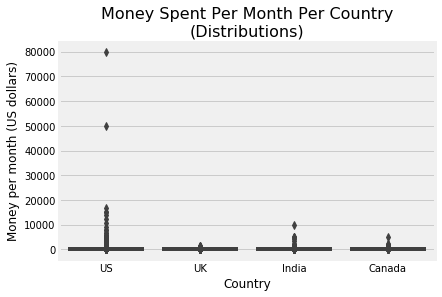

In [14]:
import seaborn as sns
sns.boxplot(y = 'spend_per_month', x = 'CountryLive',
            data = userdata)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show();

The values in UK, India and Canada seems valid. However, there are some outliers in US that spent more than 50000 in online course, which is strange and we need to examine their answers to other questions in the survey to figure out whether these big expenses with learning are justified.
<br>
<br>
But now we will emove them, and recompute the mean values

In [15]:
userdata = userdata[userdata['spend_per_month'] < 20000]

#Average spending of students in United States of America, India, United Kingdom, Canada
countries_mean = userdata.groupby(by="CountryLive").mean()
countries_mean['spend_per_month'].sort_values(ascending=False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: spend_per_month, dtype: float64

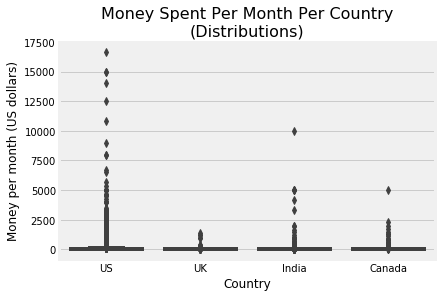

In [16]:
sns.boxplot(y = 'spend_per_month', x = 'CountryLive',
            data = userdata)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show();

We will go through the extreme values from each country.
<br>
<br>
For US, we found that there are couple records which above 6000 per months, which would be unusual even if they go to bootcamp, and they should be taken out from our dataset as we can see that they are just the extreme cases:   

In [17]:
us_outliers = userdata[ (userdata['spend_per_month'] > 6000) & (userdata['CountryLive'] == 'United States of America') ]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spend_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


For UK, there is no extreme outliers shown and we can keep it as it is.
<br>
<br>
For Canada and India, the chart above shows that most of the values are within 2500, and there are some records esp.in India that pull up the mean value. In this case we should also take out those record

In [18]:
outliers = userdata[ (userdata['CountryLive'].isin(['India', 'Canada'])) & (userdata['spend_per_month'] > 2500 ) ]
userdata = userdata.drop(outliers.index)
userdata = userdata.drop(us_outliers.index)

## Choosing the Two Best Markets

After cleaning the values as above, we can finally calculate which market should we choose:

In [19]:
mean_value =  userdata.groupby(by='CountryLive').agg({'spend_per_month': np.mean})
std_value = userdata.groupby(by='CountryLive').agg({'spend_per_month': np.std})
value_count = userdata.groupby(by='CountryLive').agg({'spend_per_month': 'count'})

stat_value = pd.concat([mean_value, std_value, value_count], axis = 1)
stat_value.columns = ['Mean', 'Standard Deviation', 'Total_respondents']
stat_value['avg_std'] = stat_value['Standard Deviation']/stat_value['Total_respondents']
stat_value.sort_values(by='Mean', ascending=False)

,Mean,Standard Deviation,Total_respondents,avg_std
CountryLive,,,,
United States of America,142.654608,502.692169,2920,0.172155
Canada,93.065400,307.512802,239,1.286664
India,65.758763,233.452738,457,0.510838
United Kingdom,45.534443,162.311836,279,0.581763


Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly 143).
<br>
<br>
We sell subscriptions at a price of $59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly 93 per month, compared to India (66) and the United Kingdom (45).
<br>
<br>
The second choice should be Canada because of its significantly higher mean. However, India also seems to be a attractive market also because
1. They have large population 
2. The mean value that respondents are willing to pay exceed our target price, and at the same time, a low standard deviation of spending in online courses per month means most of them are willing to pay within this price. 

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.